In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('medical_examination.csv')
df.head()  # checking the data


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


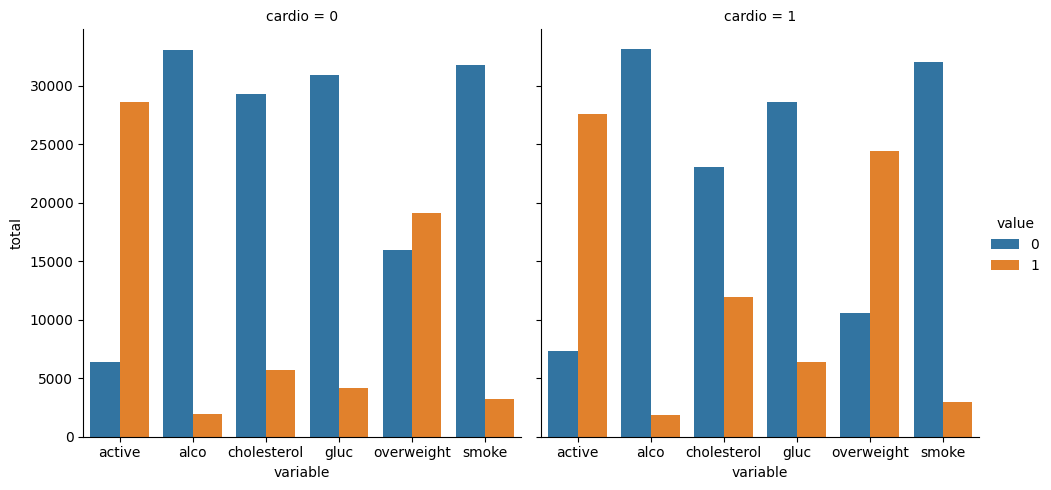

In [8]:
# Function to calculate BMI and classify as overweight (1) or not (0)
def calculate_bmi(weight, height):
    height_m = height / 100 
    bmi = weight / (height_m ** 2)
    return 1 if bmi > 25 else 0

# Add a new column 'overweight' based on BMI classification
df['overweight'] = df.apply(lambda row: calculate_bmi(row['weight'], row['height']), axis=1)


# Reclassify 'cholesterol' and 'gluc' columns: 0 for normal, 1 for above normal
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

# Reshape the DataFrame for categorical plot preparation

''' id_vars - id column, it keeps the 'cardio' column fixed . value_vars-  melts down the columns
   'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight' into a single column named 'variable' '''

df_cat =pd.melt(df,id_vars='cardio',value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])

# Add a counter column 'total' for counting occurrences
df_cat['total']=1

df_cat= df_cat.groupby(['variable','cardio','value'], as_index=False).count() 

''' asindex so as to not set group columns as the index column, when you put df_cat['total'] = 1. 
dataframe made new column to act as a counter. that counter is what we put in our y in sns. Since the column 'value' are used for grouping.'''


fig = sns.catplot(x='variable', y='total', data=df_cat, hue='value', kind='bar', col='cardio').fig


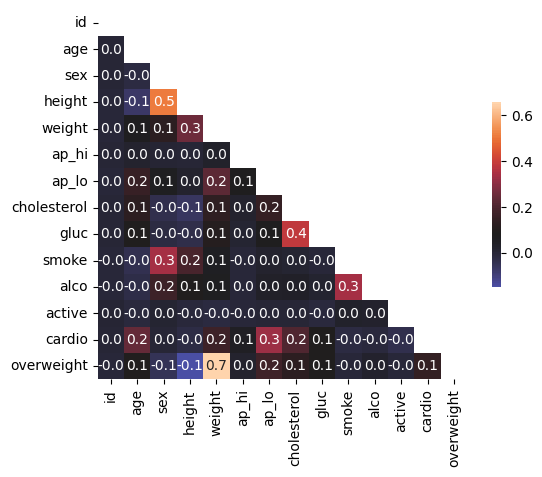

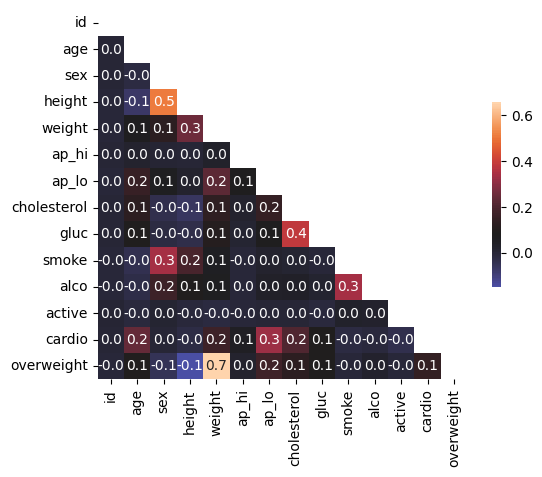

In [ ]:

def draw_heat_map():

    # Clean the data
    df_heat = df [
    (df['ap_lo']<=df['ap_hi']) &
    (df['height']>=df['height'].quantile(0.025)) &
    (df['height']<=df['height'].quantile(0.975)) &
    (df['weight']>=df['weight'].quantile(0.025))&
    (df['weight']<=df['weight'].quantile(0.975))
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr(method="pearson")

    # Generate a mask for the upper triangle
    mask =np.triu(corr) 

    # Set up the matplotlib figure
    fig, ax = plt.subplots()

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr,annot=True, square=True, mask = mask, fmt=".1f",center=0.08,cbar_kws={"shrink":0.5})

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

draw_heat_map()